## Run image view main

In [1]:
%run run.py

Executing command: python3 ./src/main.py --metadata_source=source_6  --metadata_batch=L04  --metadata_plate=110000295627 --metadata_platetype=TARGET2 --columns=Metadata_Source,Metadata_Plate,Metadata_Well,Cells_AreaShape_Eccentricity,Nuclei_AreaShape_Area  --git_clone_dir ../2023_Arevalo_BatchCorrection/inputs
Index(['Metadata_Source', 'Metadata_Batch', 'Metadata_Plate', 'Metadata_Well',
       'Metadata_Site', 'FileName_IllumAGP', 'FileName_IllumDNA',
       'FileName_IllumER', 'FileName_IllumMito', 'FileName_IllumRNA',
       'FileName_OrigAGP', 'FileName_OrigDNA', 'FileName_OrigER',
       'FileName_OrigMito', 'FileName_OrigRNA', 'PathName_IllumAGP',
       'PathName_IllumDNA', 'PathName_IllumER', 'PathName_IllumMito',
       'PathName_IllumRNA', 'PathName_OrigAGP', 'PathName_OrigDNA',
       'PathName_OrigER', 'PathName_OrigMito', 'PathName_OrigRNA'],
      dtype='object')


## Display Interactive Map

In [71]:
from src import methods
from importlib import reload
reload(methods)

adata_path = "/home/anravi2/cell_painting/2023_Arevalo_BatchCorrection/outputs/scenario_4/metrics/target2/scib/mad_int_featselect_scvi_clusters.h5ad"
clicked_points_path = "clicked_points.csv"

methods.display_interactive_umap(adata_path, clicked_points_path)

KeyboardInterrupt: 

## Check metrics

### All imports and paths

In [4]:
import sys
from importlib import reload

# Add the custom package path
sys.path.append('/home/anravi2/cell_painting/Batch_effects_viewer/src')

# Import and reload custom modules
import preprocessing.io as io
import preprocessing.stats as stats
import preprocessing.normalize as normalize
import preprocessing.outliers as outliers
import preprocessing.transform as transform
import preprocessing.feature_selection as feature_selection

reload(io)
reload(stats)
reload(normalize)
reload(outliers)
reload(transform)
reload(feature_selection)

# Import specific functions if needed
from preprocessing.io import *       # Assuming io.py contains necessary functions
from preprocessing.stats import *    # Assuming stats.py contains necessary functions
from preprocessing.normalize import * # Assuming normalize.py contains necessary functions
from preprocessing.outliers import *  # Assuming outliers.py contains necessary functions
from preprocessing.transform import * # Assuming transform.py contains necessary functions
from preprocessing.feature_selection import * # Assuming feature_selection.py contains necessary functions

In [1]:
import os
# File paths
# Define the common folder path
common_folder = "../scenario_4"

# Create the common folder if it doesn't exist
if not os.path.exists(common_folder):
    os.makedirs(common_folder)

# File paths
parquet_path = "/home/anravi2/cell_painting/2023_Arevalo_BatchCorrection/outputs/scenario_4/raw.parquet" #Merged metadata
stats_path = os.path.join(common_folder, "test.parquet")
neg_stats_path = os.path.join(common_folder, "test_neg.parquet")
variant_feats_path = os.path.join(common_folder, "test_variant_feats.parquet")
normalize_path = os.path.join(common_folder, "test_mad.parquet")
outliers_path = os.path.join(common_folder, "test_outliers.parquet")
drop_path = os.path.join(common_folder, "test_drop.parquet")
clip_path = os.path.join(common_folder, "test_clip.parquet")
int_path = os.path.join(common_folder, "test_int.parquet")
feat_path = os.path.join(common_folder, "test_feat.parquet")
imputeknn_path = os.path.join(common_folder, "test_imputeknn.parquet")
imputemedian_path = os.path.join(common_folder, "test_imputemedian.parquet")

label_key, batch_key = "Metadata_JCP2022", "Metadata_Batch"
 

silhoutte_label_path = os.path.join(common_folder, "silhoutter_label.csv")
silhoutte_batch_path = os.path.join(common_folder, "silhoutter_batch.csv")

silhoutte_label_single_path = os.path.join(common_folder, "test_silhoutte_single_label.bin")
silhoutte_batch_single_path = os.path.join(common_folder, "test_silhoutte_single_batch.bin")

top_k_features_path = os.path.join(common_folder, "top_k_features.parquet")
feat_removed_path = os.path.join(common_folder, "feat_removed.parquet")

# Calculate Jenson Shannon Divergence
js_path = os.path.join(common_folder, "test_js.bin")

js_batch_path = os.path.join(common_folder, "test_js_batch.bin")



In [5]:
# #Read the pandas files based on path
# import pandas as pd

import json
import numpy as np
import plotly.express as px

#Read the pandas files based on path
import pandas as pd

#Create clusters from DF and converted to AnnData
import anndata as ad
# import pandas as pd

from src.metrics import scib as scib_metrics
from importlib import reload

from src.preprocessing import feature_selection

reload(scib_metrics)
reload(io)


# Using features from the top k values
reload(feature_selection)


<module 'src.preprocessing.feature_selection' from '/home/anravi2/cell_painting/Batch_effects_viewer/src/preprocessing/feature_selection.py'>

### Compute Metrics

In [4]:
# Function calls
compute_negcon_stats(parquet_path, neg_stats_path)
select_variant_features(parquet_path, neg_stats_path, variant_feats_path, union=False)
mad(variant_feats_path, neg_stats_path, normalize_path)
compute_stats(normalize_path, stats_path)
iqr(100.0, normalize_path, stats_path, outliers_path)

# Additional function calls based on the rules
drop_cols(normalize_path, outliers_path, drop_path)
clip_cols(drop_path, outliers_path, 500.0, clip_path)
rank_int(clip_path, int_path)
# select_features(int_path, feat_path)
impute_knn(int_path, outliers_path, imputeknn_path)
impute_median(imputeknn_path, outliers_path, imputemedian_path)

  0%|          | 0/4530 [00:00<?, ?it/s]

  0%|          | 0/3366 [00:00<?, ?it/s]

In [4]:
#Display attributes of features "compartment", "technical", "family" and "type"
for i in df["type"].unique():
    print(i)

AreaShape
Children
Correlation
Granularity
Intensity
Neighbors
Parent
RadialDistribution
Texture
Number
ImageQuality
Threshold
Location
ObjectSkeleton


In [7]:
#Create clusters from DF and converted to AnnData
import anndata as ad
import pandas as pd

from src.metrics import scib as scib_metrics
from importlib import reload


reload(scib_metrics)
reload(io)

adata_path = os.path.join(common_folder, "test_clusters.h5ad")

In [60]:
# Find the ASW score with both compound label and batch label

label_key, batch_key = "Metadata_JCP2022", "Metadata_Batch"

# Find Silhouette score

silhoutte_label_path = os.path.join(common_folder, "silhoutter_label.csv")
silhoutte_batch_path = os.path.join(common_folder, "silhoutter_batch.csv")




In [9]:
scib_metrics.asw(imputemedian_path, label_key, silhoutte_label_path)

In [11]:
scib_metrics.silhouette_batch(imputemedian_path, label_key, batch_key, silhoutte_batch_path)

In [13]:
import numpy as np

data = np.fromfile(silhoutte_batch_path)
print(data)

[0.78784513]


In [10]:
#Calculate NMI score
import numpy as np

label_key = "Metadata_JCP2022"
nmi_path = os.path.join(common_folder, "test_nmi.bin")

scib_metrics.nmi(adata_path, label_key, nmi_path)
data = np.fromfile(nmi_path)
print(data)

[0.46811476]


In [91]:
#Read AnnData file
adata = ad.read_h5ad(adata_path)

In [15]:

df_main = pd.read_parquet(imputemedian_path)

# # Define the tags
# tags = ["Cells_Intensity", "Metadata_Batch"]

# # Filter columns that contain either of the tags
# filtered_columns = df_main.columns[df_main.columns.str.contains('|'.join(tags))]

# # Select the filtered columns and display the first few rows
# df_filtered = df_main[filtered_columns]
# df_filtered.head()



In [81]:
import seaborn as sns

# df_main_reset = df_main.reset_index()
# Create a color palette for the Metadata_Batch column
unique_batches = df_main["Metadata_Batch"].unique()
palette = sns.color_palette("hsv", len(unique_batches))
batch_colors = dict(zip(unique_batches, palette))


In [82]:

# Map the Metadata_Batch column to colors
row_colors = [batch_colors[df_main.loc[df_main.index, "Metadata_Batch"][i]] for i in range(len(df_main.loc[df_main.index, "Metadata_Batch"])) ]


In [85]:
import matplotlib.pyplot as plt

/home/anravi2/anaconda3/envs/batchcp/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/anravi2/anaconda3/envs/batchcp/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


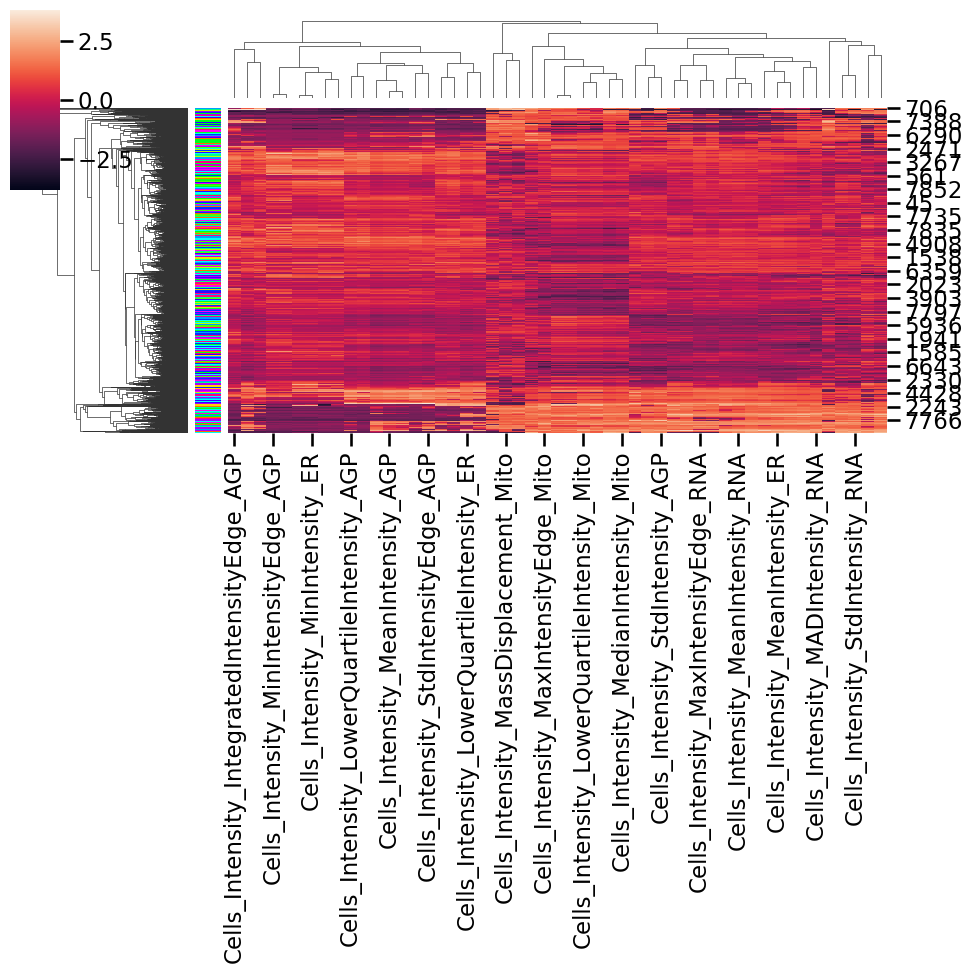

In [86]:
#Create clustermap
tag = "Cells_Intensity"
pdf_path = os.path.join(common_folder, "test_clustermap.pdf")

g = sns.clustermap(df_main.filter(like=tag), row_colors=row_colors)

#Save the clustermap
plt.savefig(pdf_path)

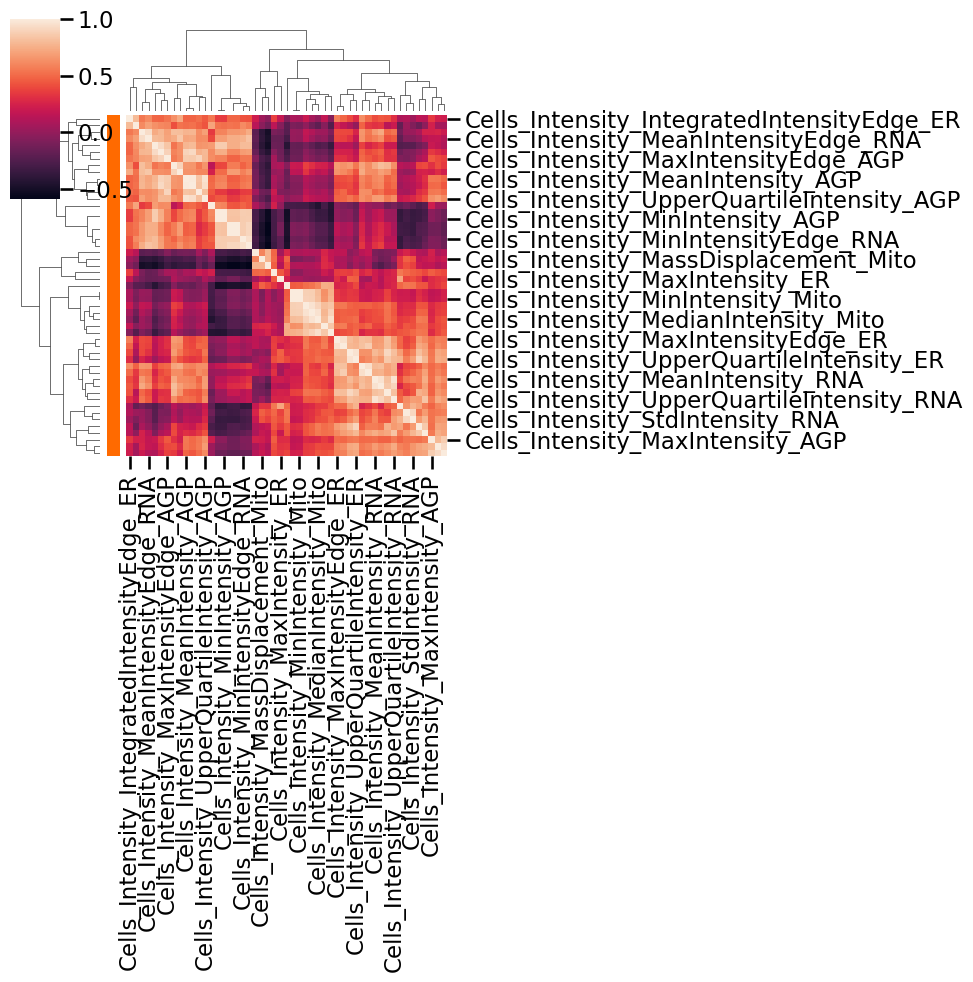

In [87]:
g = sns.clustermap(df_main.filter(like=tag).corr(), row_colors=row_colors)

pdf_path = os.path.join(common_folder, "test_clustermap_corr.pdf")
#Save the clustermap
plt.savefig(pdf_path)

## Do it featurewise

In [62]:
import anndata as ad
import pandas as pd

from src.metrics import scib as scib_metrics
from importlib import reload


reload(scib_metrics)
reload(io)

<module 'preprocessing.io' from '/home/anravi2/cell_painting/Batch_effects_viewer/src/preprocessing/io.py'>

In [63]:
# Featurewise ASW both batch and compound

label_key, batch_key = "Metadata_JCP2022", "Metadata_Batch"

In [151]:
df = pd.read_parquet("../test/test_imputemedian.parquet")

In [154]:
df["Metadata_Batch"].unique()

['p210824CPU2OS48hw384exp022JUMP', 'p210830CPU2OS48hw384exp023JUMP', 'p210906CPU2OS48hw384exp025JUMP', 'p210831CPU2OS48hw384exp024JUMP', 'p210914CPU2OS48hw384exp027JUMP', ..., 'p211012CPU2OS48hw384exp033JUMP', 'p210927CPU2OS48hw384exp029JUMP', 'p210920CPU2OS48hw384exp028JUMP', 'p210928CPU2OS48hw384exp030JUMP', 'p211123CPU2OS48hw384exp036JUMP']
Length: 13
Categories (13, object): ['p210824CPU2OS48hw384exp022JUMP', 'p210830CPU2OS48hw384exp023JUMP', 'p210831CPU2OS48hw384exp024JUMP', 'p210906CPU2OS48hw384exp025JUMP', ..., 'p211012CPU2OS48hw384exp033JUMP', 'p211102CPU2OS48hw384exp034JUMP', 'p211109CPU2OS48hw384exp035JUMP', 'p211123CPU2OS48hw384exp036JUMP']

In [61]:
# Find Silhouette score

# common_folder = "../test"

silhoutte_label_single_path = os.path.join(common_folder, "test_silhoutte_single_label.bin")
silhoutte_batch_single_path = os.path.join(common_folder, "test_silhoutte_single_batch.bin")

In [65]:
reload(scib_metrics)

scib_metrics.asw_single_features(imputemedian_path, label_key, silhoutte_label_single_path)
# scib_metrics.silhouette_batch_single_features(imputemedian_path, label_key, batch_key, silhoutte_batch_single_path)

Computing ASW: 100%|██████████| 3366/3366 [52:30<00:00,  1.07it/s]


In [66]:
reload(scib_metrics)

scib_metrics.silhouette_batch_single_features(imputemedian_path, label_key, batch_key, silhoutte_batch_single_path)

Computing ASW batch:   2%|▏         | 53/3366 [00:57<59:51,  1.08s/it]  

Computing ASW batch: 100%|██████████| 3366/3366 [1:05:34<00:00,  1.17s/it]


In [ ]:

adata_path_feature = os.path.join(common_folder, "test_clusters_featurewise.h5ad")


In [ ]:

scib_metrics.cluster_featurewise(imputemedian_path, adata_path_feature)


In [50]:
adata = ad.read_h5ad(adata_path_feature)

In [25]:
import numpy as np
import json
import os

label_key = "Metadata_JCP2022"
batch_key = "Metadata_Batch"


In [8]:

nmi_path = os.path.join(common_folder, "test_nmi_featurewise")
kbet_path = os.path.join(common_folder, "test_metric_featurewise")


## Jenson shannon divergence per feature

The above scores consider compounds as "clusters" and calculates scores on alignment of features to those clusters. This seems to select bad features.

Instead we consider the following approach. We use Jenson-Shannon Divergence scores (JS) to calculate how good features are, by how skewed the features when conditioned on cluster assignment from a unconditioned distribution.

In [5]:
# Calculate Jenson Shannon Divergence
js_path = os.path.join(common_folder, "test_js.bin")

js_batch_path = os.path.join(common_folder, "test_js_batch.bin")

In [45]:
reload(scib_metrics)


<module 'src.metrics.scib' from '/home/anravi2/cell_painting/Batch_effects_viewer/src/metrics/scib.py'>

In [46]:
scib_metrics.average_jenson_shannon_per_feature(clip_path, label_key, js_path)

Computing JS: 100%|██████████| 3051/3051 [04:55<00:00, 10.32it/s]


In [47]:
scib_metrics.average_jenson_shannon_per_feature_batch(clip_path, batch_key, js_batch_path)

Computing JS: 100%|██████████| 3051/3051 [01:02<00:00, 48.45it/s]


## Manhattan Plot of metrics

In [8]:

# Load the dictionary from the JSON file
with open(js_path, 'r') as file:
    data = json.load(file)

with open(js_batch_path, 'r') as file:
    data_batch = json.load(file)


In [204]:
print(max(data_batch.values()))

0.6665485948953757


In [56]:
# Use keys of data to create new dictionary on data_batch
data_batch_new = {key: data_batch[i] for key, i in zip(data.keys(), range(len(data_batch)))}

In [57]:
asw_bathc_dict_path = os.path.join(common_folder, "test_asw_dict_batch.json")

with open(asw_bathc_dict_path, 'w') as json_file:
        json.dump(data_batch_new, json_file, indent=4)

In [7]:
asw_bathc_dict_path = os.path.join(common_folder, "test_asw_dict_batch.json")

In [14]:
with open(asw_bathc_dict_path, 'r') as file:
    data_batch = json.load(file)

### Manhattan Plot

In [110]:

from collections import defaultdict

# data_batch.keys()


compartment_split = defaultdict(list)

# Parse keys and group values
for key, value in data_batch.items():
    key_parts = key.split('_')
    group_key = key_parts[0]  # The third word (Cells, Nuclei, Cytoplasm, etc.)
    compartment_split[group_key].append((key, value))

type_split = defaultdict(list)

# Parse keys and group values
for key, value in data_batch.items():
    key_parts = key.split('_')
    group_key = key_parts[1]  # The third word (Cells, Nuclei, Cytoplasm, etc.)
    type_split[group_key].append((key, value))




In [111]:
from src import methods
# reload(methods)
import os

os.makedirs(os.path.join(common_folder, "fig"), exist_ok=True)

manhattan_save_path = os.path.join(common_folder, "fig/manhattan_js_batch.html")

methods.create_manhattan_plot(type_split, save_path=manhattan_save_path, title="Manhattan Plot Scenario 4, types")

### Simulations

Threshold:  0.9


100%|██████████| 18/18 [01:46<00:00,  5.93s/it]


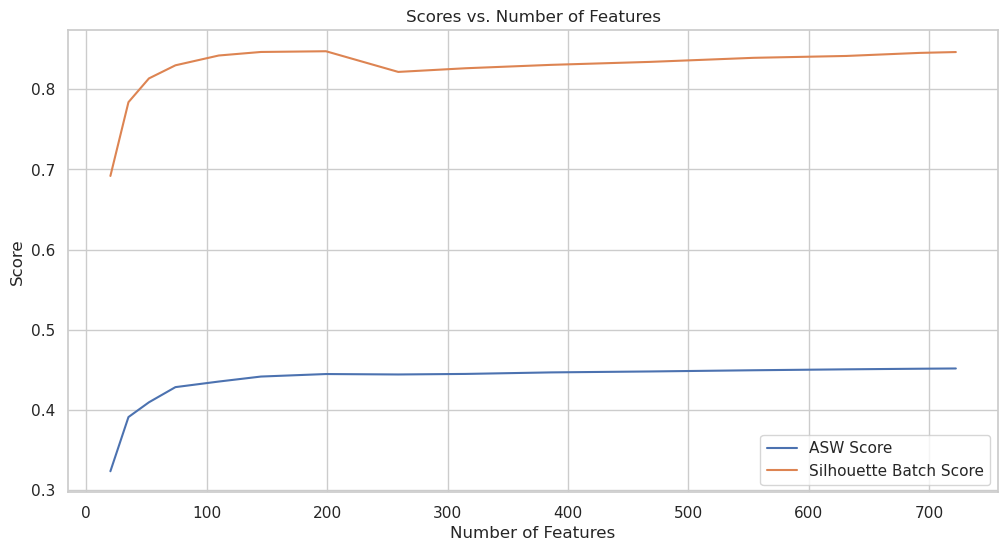

In [48]:
import matplotlib.pyplot as plt
from tqdm import tqdm
reload(feature_selection)
reload(scib_metrics)
# Initialize arrays to store the number of features and scores
num_features = []
asw_scores = []
silhouette_batch_scores = []
# k_1 = 1000
feature_selection.select_features(clip_path, feat_removed_path)
feature_list = []
for (k_1, k_2) in zip(tqdm(range(400, 4000, 200)), range(400, 4000, 200)):
        #Store previous top k features
        # Run feature selection
        feature_selection.top_intersecting_features(feat_removed_path, js_path, js_batch_path, top_k_features_path, k_1, k_2)
        # feature_selection.add_random_features_to_top_k(top_k_features_path, k_1)
        scib_metrics.asw(top_k_features_path, label_key, silhoutte_label_path)
        scib_metrics.silhouette_batch(top_k_features_path, label_key, batch_key, silhoutte_batch_path)
        #Store current top k features
        current = pd.read_parquet(top_k_features_path)
        # Store the number of features
        num_features.append(pd.read_parquet(top_k_features_path).shape[1])  # Assuming the number of features corresponds to k_1, adjust if needed
        
        # Read the scores from the output files
        asw_score = np.fromfile(silhoutte_label_path, dtype=float)[0]
        silhouette_batch_score = np.fromfile(silhoutte_batch_path, dtype=float)[0]
        # store in a array the unique selected features in each loop in order
        for feature in current.columns:
            if feature not in feature_list:
                feature_list.append(feature)
        # Store the scores
        asw_scores.append(asw_score)
        silhouette_batch_scores.append(silhouette_batch_score)

# Plot the scores against the number of features
plt.figure(figsize=(12, 6))
#store feature list as json
feature_list_path = os.path.join(common_folder, "feature_list.json")
#remove features that start with Metadata
feature_list = [feature for feature in feature_list if not feature.startswith("Metadata")]
with open(feature_list_path, 'w') as json_file:
    json.dump(feature_list, json_file, indent=4)

plt.plot(num_features, asw_scores, label='ASW Score')
plt.plot(num_features, silhouette_batch_scores, label='Silhouette Batch Score')

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Scores vs. Number of Features')
plt.legend()

plt.grid(True)
plt.show()

In [22]:
print(feature_list)

['Nuclei_RadialDistribution_RadialCV_AGP_4of4', 'Cytoplasm_Intensity_MaxIntensity_Mito', 'Image_Granularity_1_RNA', 'Nuclei_Granularity_2_AGP', 'Cells_Granularity_13_DNA', 'Nuclei_Granularity_4_DNA', 'Nuclei_RadialDistribution_MeanFrac_ER_4of4', 'Cells_Granularity_6_Mito', 'Nuclei_Granularity_13_DNA', 'Cells_Granularity_11_DNA', 'Nuclei_Granularity_2_Mito', 'Nuclei_RadialDistribution_RadialCV_AGP_2of4', 'Image_Granularity_8_AGP', 'Nuclei_Granularity_3_AGP', 'Image_Granularity_15_DNA', 'Nuclei_Granularity_2_DNA', 'Nuclei_RadialDistribution_RadialCV_DNA_4of4', 'Cytoplasm_Texture_InfoMeas1_AGP_10_01_256', 'Cells_Correlation_Manders_Mito_RNA', 'Cells_RadialDistribution_RadialCV_mito_tubeness_2of16', 'Nuclei_AreaShape_Zernike_2_0', 'Image_Texture_InfoMeas2_DNA_10_01_256', 'Image_Granularity_9_AGP', 'Image_Granularity_6_AGP', 'Image_Texture_DifferenceVariance_AGP_3_02_256', 'Nuclei_Texture_InfoMeas2_DNA_5_01_256', 'Cells_Granularity_12_DNA', 'Image_Texture_DifferenceVariance_ER_3_02_256', 'I

In [112]:
print(df_test.columns)

Index(['Cells_AreaShape_BoundingBoxMaximum_X',
       'Cells_AreaShape_BoundingBoxMaximum_Y',
       'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Eccentricity',
       'Cells_AreaShape_Extent', 'Cells_AreaShape_Orientation',
       'Cells_AreaShape_Solidity', 'Cells_AreaShape_Zernike_0_0',
       'Cells_AreaShape_Zernike_1_1', 'Cells_AreaShape_Zernike_2_0',
       ...
       'Metadata_Source', 'Metadata_Plate', 'Metadata_Well',
       'Metadata_JCP2022', 'Metadata_Batch', 'Metadata_PlateType',
       'Metadata_PertType', 'Metadata_Row', 'Metadata_Column',
       'Metadata_Microscope'],
      dtype='object', length=795)


In [91]:
#feature_selection.select_features(normalize_path, feat_removed_path)
feature_selection.select_features(clip_path, feat_removed_path)

Threshold:  0.9


In [57]:
feature_selection.top_intersecting_features(feat_removed_path, js_path, js_batch_path, top_k_features_path, 300, 300)

In [19]:
# Feature selected from top k values
df_feat = pd.read_parquet(top_k_features_path)


In [20]:
import seaborn as sns

# Extract columns without Metadata
df_feat_new = df_feat.loc[:, ~df_feat.columns.str.contains('Metadata')]

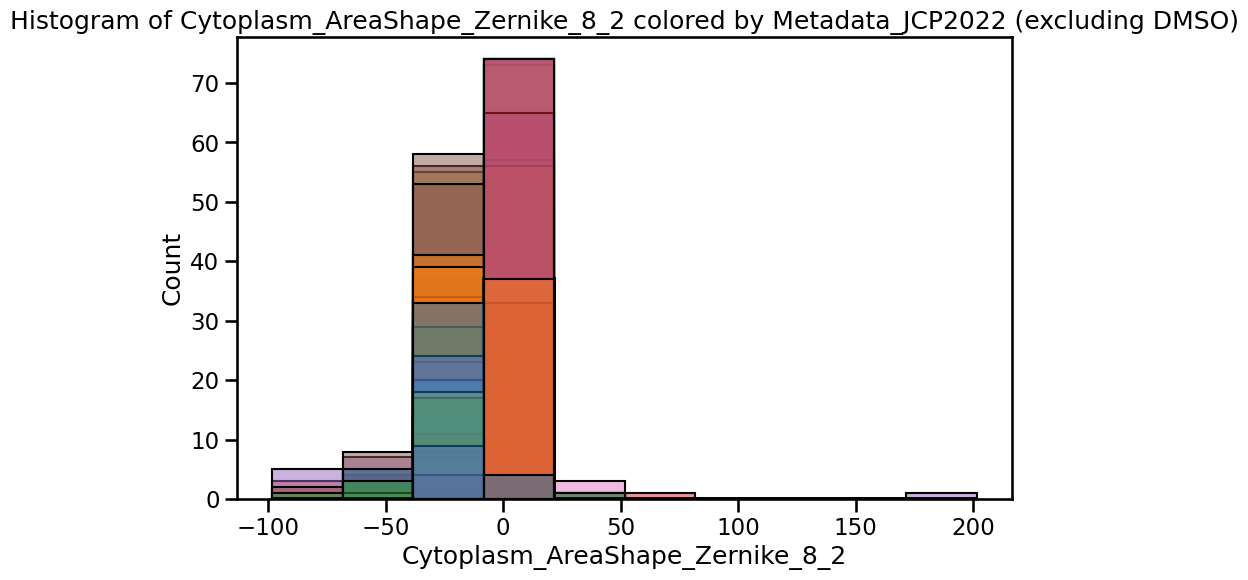

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

metadata_column = 'Metadata_JCP2022'
col = "Cytoplasm_AreaShape_Zernike_8_2"

# Create a temporary DataFrame with the selected feature and metadata column
temp_df = pd.DataFrame({
    col: df_feat_removed_new[col],
    metadata_column: df_feat[metadata_column]
})

# Filter out rows where Metadata_JCP2022 is "DMSO"
temp_df_filtered = temp_df[temp_df[metadata_column] != "DMSO"]

# Plot the histogram with the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(data=temp_df_filtered, x=col, hue=metadata_column, bins=10, palette="tab10", legend=False)

plt.title(f'Histogram of {col} colored by {metadata_column} (excluding DMSO)')
plt.show()

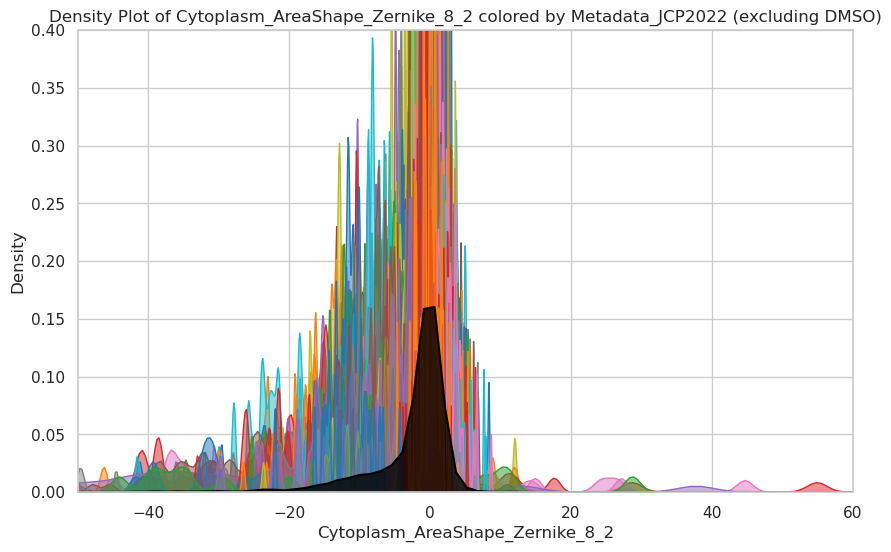

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

metadata_column = 'Metadata_JCP2022'
col = "Cytoplasm_AreaShape_Zernike_8_2"

# Create a temporary DataFrame with the selected feature and metadata column
temp_df = pd.DataFrame({
    col: df_feat_new[col],
    metadata_column: df_feat[metadata_column]
})

# Filter out rows where Metadata_JCP2022 is "DMSO"
temp_df_filtered = temp_df[temp_df[metadata_column] != "DMSO"]

# Plot overlayed density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=temp_df_filtered, x=col, hue=metadata_column, common_norm=False, palette="tab10", fill=True, alpha=0.5, legend=False, bw_adjust=0.1)
sns.kdeplot(data=temp_df_filtered, x=col, color="black", fill=True, alpha=0.8, linewidth=1.5, label='Overall', bw_adjust=0.5)
#Standardize the x-axis and y-axis
plt.xlim(-50, 60)
plt.ylim(0, 0.4)
plt.title(f'Density Plot of {col} colored by {metadata_column} (excluding DMSO)')
plt.show()

In [61]:
df_feat_new.columns

Index(['Cytoplasm_Intensity_MaxIntensity_Mito',
       'Cytoplasm_Correlation_K_AGP_Mito', 'Cells_Correlation_Manders_RNA_AGP',
       'Nuclei_Granularity_7_AGP',
       'Cytoplasm_Intensity_MeanIntensityEdge_Mito',
       'Nuclei_Granularity_2_Mito', 'Nuclei_Granularity_5_RNA',
       'Nuclei_Granularity_2_AGP',
       'Nuclei_RadialDistribution_RadialCV_Mito_2of4'],
      dtype='object')

In [52]:
# Extract columns from feat removed that do not occur in top-k-path
df_feat_removed = pd.read_parquet(feat_removed_path)
df_feat_removed_new = df_feat_removed.loc[:, ~df_feat_removed.columns.str.contains('Metadata')]
df_feat_removed_new = df_feat_removed_new.loc[:, ~df_feat_removed_new.columns.isin(df_feat_new.columns)]

In [53]:
df_feat_removed_new.columns

Index(['Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_Orientation',
       'Cells_AreaShape_Zernike_2_2', 'Cells_AreaShape_Zernike_3_1',
       'Cells_AreaShape_Zernike_4_2', 'Cells_AreaShape_Zernike_4_4',
       'Cells_AreaShape_Zernike_5_5', 'Cells_AreaShape_Zernike_6_2',
       'Cells_AreaShape_Zernike_8_2', 'Cells_AreaShape_Zernike_8_4',
       'Cells_AreaShape_Zernike_8_8', 'Cells_Correlation_Correlation_AGP_DNA',
       'Cells_Correlation_Overlap_AGP_ER', 'Cells_Granularity_11_ER',
       'Cells_Granularity_15_DNA',
       'Cells_Intensity_IntegratedIntensityEdge_RNA',
       'Cells_Intensity_MinIntensityEdge_RNA',
       'Cells_RadialDistribution_FracAtD_mito_tubeness_11of20',
       'Cells_RadialDistribution_RadialCV_mito_tubeness_16of20',
       'Cells_RadialDistribution_RadialCV_mito_tubeness_1of16',
       'Cells_Texture_Correlation_DNA_10_03_256',
       'Cells_Texture_InfoMeas1_DNA_3_00_256',
       'Cytoplasm_AreaShape_Zernike_4_2', 'Cytoplasm_AreaShape_Zernike_

In [40]:
# Use seaborn to do a KDE plot grid for top n and bottom n features from feature_list by Metadata_JCP2022 and Metadata_Batch
import seaborn as sns

#Read feature_list
import json

feature_list_path = os.path.join(common_folder, "feature_list.json")

with open(feature_list_path, 'r') as file:
    feature_list = json.load(file)

# Define the number of features to plot
n = 5

metadata_label = 'Metadata_JCP2022'
metadata_batch = 'Metadata_Batch'

#Plot from feature_list and df_feat
df_feat = pd.read_parquet(feat_removed_path)

# Create a temporary DataFrame with the selected features (featurelist) and metadata columns
temp_df = df_feat.loc[:, feature_list[:n] + feature_list[-n:] + [metadata_label, metadata_batch]]

temp_df_new = temp_df.loc[:, ~temp_df.columns.str.contains('Metadata')]
# Filter out rows where Metadata_JCP2022 is "DMSO"
temp_df_filtered = temp_df[temp_df[metadata_label] != "DMSO"]




In [24]:
print(feature_list)

['Nuclei_RadialDistribution_RadialCV_AGP_4of4', 'Cytoplasm_Intensity_MaxIntensity_Mito', 'Image_Granularity_1_RNA', 'Nuclei_Granularity_2_AGP', 'Cells_Granularity_13_DNA', 'Nuclei_Granularity_4_DNA', 'Nuclei_RadialDistribution_MeanFrac_ER_4of4', 'Cells_Granularity_6_Mito', 'Nuclei_Granularity_13_DNA', 'Cells_Granularity_11_DNA', 'Nuclei_Granularity_2_Mito', 'Nuclei_RadialDistribution_RadialCV_AGP_2of4', 'Image_Granularity_8_AGP', 'Nuclei_Granularity_3_AGP', 'Image_Granularity_15_DNA', 'Nuclei_Granularity_2_DNA', 'Nuclei_RadialDistribution_RadialCV_DNA_4of4', 'Cytoplasm_Texture_InfoMeas1_AGP_10_01_256', 'Cells_Correlation_Manders_Mito_RNA', 'Cells_RadialDistribution_RadialCV_mito_tubeness_2of16', 'Nuclei_AreaShape_Zernike_2_0', 'Image_Texture_InfoMeas2_DNA_10_01_256', 'Image_Granularity_9_AGP', 'Image_Granularity_6_AGP', 'Image_Texture_DifferenceVariance_AGP_3_02_256', 'Nuclei_Texture_InfoMeas2_DNA_5_01_256', 'Cells_Granularity_12_DNA', 'Image_Texture_DifferenceVariance_ER_3_02_256', 'I

Index(['Image_Texture_AngularSecondMoment_AGP_10_03_256',
       'Image_Intensity_MADIntensity_ER',
       'Image_ImageQuality_MADIntensity_OrigDNA',
       'Image_Texture_SumEntropy_AGP_5_01_256',
       'Image_Intensity_TotalIntensity_DNA', 'Cells_Correlation_RWC_ER_Mito',
       'Cytoplasm_RadialDistribution_RadialCV_mito_tubeness_16of20',
       'Image_Granularity_3_DNA', 'Nuclei_Correlation_Correlation_ER_Mito',
       'Nuclei_AreaShape_Orientation'],
      dtype='object')
Image_Texture_AngularSecondMoment_AGP_10_03_256
Image_Intensity_MADIntensity_ER
Image_ImageQuality_MADIntensity_OrigDNA
Image_Texture_SumEntropy_AGP_5_01_256
Image_Intensity_TotalIntensity_DNA
Cells_Correlation_RWC_ER_Mito
Cytoplasm_RadialDistribution_RadialCV_mito_tubeness_16of20
Image_Granularity_3_DNA
Nuclei_Correlation_Correlation_ER_Mito
Nuclei_AreaShape_Orientation


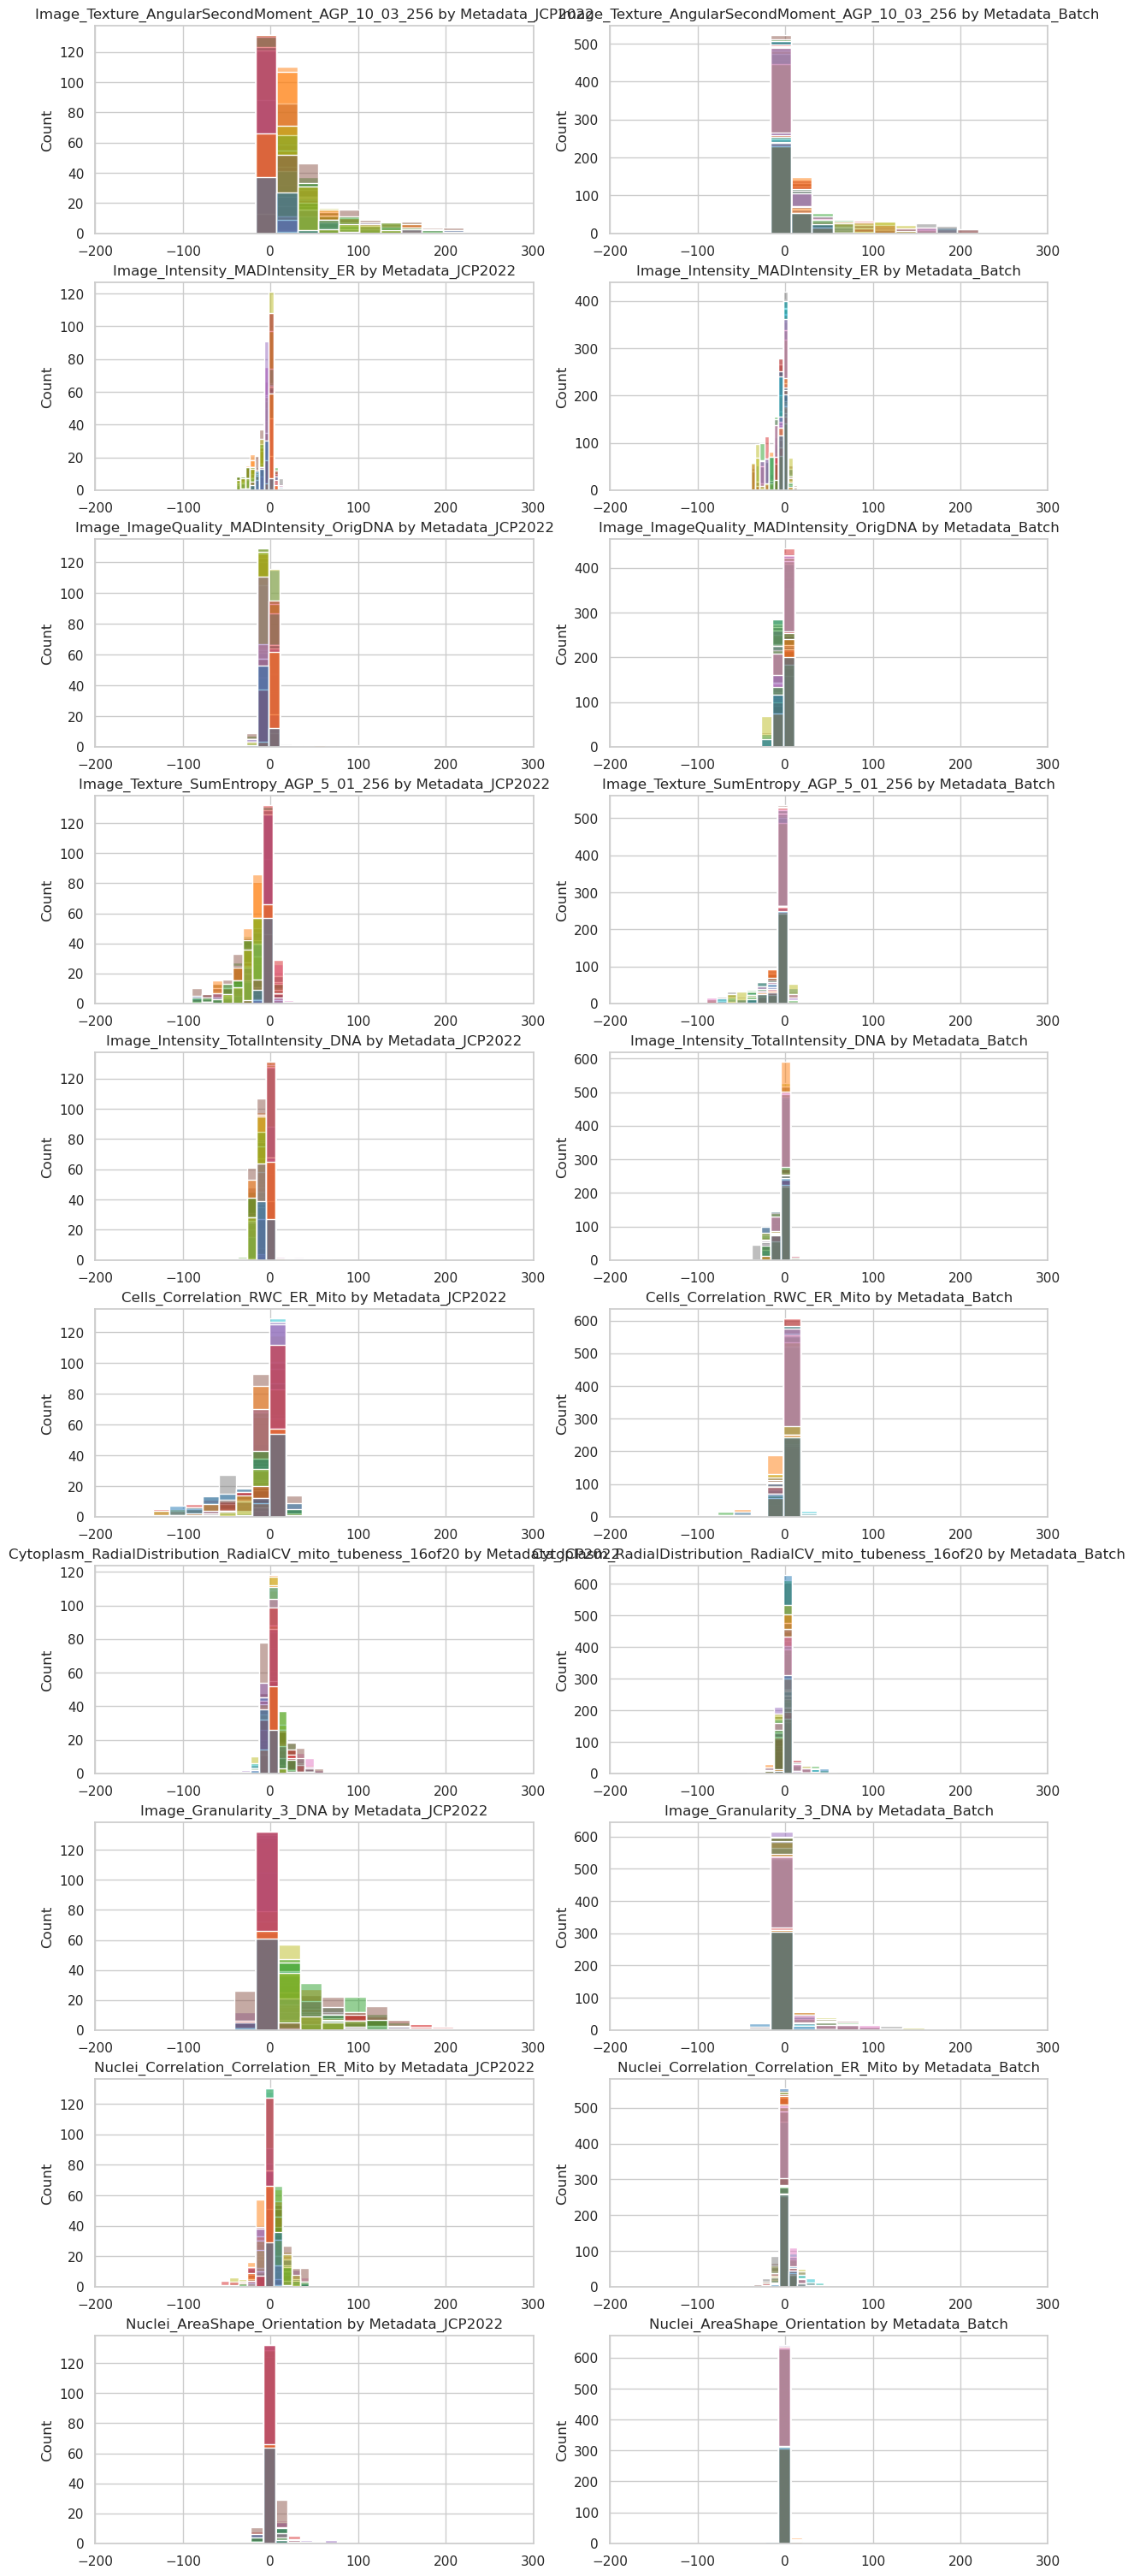

In [41]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Set the aesthetic style of the plots
# sns.set_theme(style='whitegrid')

# # Assuming 'features' is your DataFrame
# # Exclude the last two columns to get the feature names
# feature_names = temp_df_filtered.columns[:-2]
# num_features = len(feature_names)
# print(feature_names)
# # Create a figure and axes with the appropriate size
# fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, num_features * 3), constrained_layout=True)

# # Ensure 'axes' is always a 2D array
# axes = np.atleast_2d(axes)

# #fix the x-axis for all plots
# x_min = -200
# x_max = 300

# # Loop over each feature to create histograms
# for i, feature in enumerate(feature_names):
#     # Histogram hued by 'Metadata_JCP2022' on the left
#     sns.histplot(
#         data=temp_df_filtered, 
#         x=feature, 
#         hue=metadata_label, 
#         bins=10, 
#         palette="tab10", 
#         legend=False,
#         ax=axes[i, 0])
#     axes[i, 0].set_title(f'{feature} by Metadata_JCP2022')
#     axes[i, 0].set_xlabel('')  # Remove individual x-labels for cleanliness
#     axes[i, 0].set_ylabel('Count')
#     axes[i, 0].set_xlim(x_min, x_max)
#     # Histogram hued by 'Metadata_Batch' on the right
#     sns.histplot(
#         data=temp_df_filtered, 
#         x=feature, 
#         hue='Metadata_Batch', 
#         bins=10, 
#         palette="tab10", 
#         legend=False,
#         ax=axes[i, 1])
#     print(feature)
#     # sns.kdeplot(
#     #     data=temp_df_filtered,
#     #     x=col,
#     #     hue=metadata_batch,
#     #     common_norm=False, 
#     #     palette="tab10", 
#     #     fill=True, 
#     #     alpha=0.5, 
#     #     legend=False, 
#     #     bw_adjust=0.1,
#     #     ax=axes[i, 1])
#     axes[i, 1].set_title(f'{feature} by Metadata_Batch')
#     axes[i, 1].set_xlabel('')
#     axes[i, 1].set_ylabel('Count')
#     axes[i, 1].set_xlim(x_min, x_max)

# # # Adjust layout and display the plot
# # plt.tight_layout()
# # plt.show()



In [12]:
# temp_df.head()

,Nuclei_Granularity_6_RNA,Cytoplasm_AreaShape_Zernike_6_0,Metadata_JCP2022,Metadata_Batch
0,-0.311099,1.002806,JCP2022_060040,20210712_Batch_5
1,-0.211084,0.513563,JCP2022_028645,20210712_Batch_5
2,3.333638,-0.416459,JCP2022_074697,20210712_Batch_5
3,4.160914,-1.013314,DMSO,20210712_Batch_5
4,2.312626,-6.765023,JCP2022_024824,20210712_Batch_5


In [10]:
# Plot histogram of each feature by Metadata_JCP2022 on left and Metadata_Batch on right
# Create a FacetGrid for left and right grids
g = sns.FacetGrid(data=features_with_jcp, col='Metadata_JCP2022', col_wrap=2, sharex=False, sharey=False)

# Loop through the features and map the histograms
for feature in features_with_jcp:  # Exclude the last column which is Metadata_JCP2022
    # Plot on the left for `Metadata_JCP2022`
    g.map(sns.histplot, feature, hue="Metadata_JCP2022", bins=10, palette='tab10', kde=True)
    # Plot on the right for `Metadata_Batch`
    g.map(sns.histplot, feature, hue="Metadata_Batch", bins=10, palette='tab10', kde=True)
    
g.add_legend()

ValueError: Could not interpret value `Metadata_JCP2022` for `hue`. Value is a string, but `data` was not passed.

Error in callback <function flush_figures at 0x7fe36df06340> (for post_execute):


KeyboardInterrupt: 